In [1]:
# Connect to Google Colab
from google.colab import drive
from google.colab import output

# This will prompt for authorization to access your Google Drive from Colab.
drive.mount('/content/drive', force_remount=True)

# After mounting, you can navigate to a specific folder using the usual UNIX cd command.
# Replace 'your_folder_path' with the actual path of your folder inside Google Drive.
folder_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project'
package_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive'
truss_path = '/content/drive/MyDrive/Colab Notebooks/Truss_project/truss_bridge'

# Support third party widgets
output.enable_custom_widget_manager()

Mounted at /content/drive


In [2]:
%cd "$package_path"

from geometrymodule import geometry

/content/drive/MyDrive/Colab Notebooks/Truss_project/pyJive


In [3]:
geom = geometry(package_path, truss_path)

In [4]:
geom.rewrite_file()

In [5]:
geom.update_nodes([1.33196, 1.54672, 1.50928, 1.49382, 1.64641], returns=True)

x        y
0    0.0  0.00000
1    1.0  0.00000
2    1.0  1.33196
3    2.0  0.00000
4    2.0  1.54672
5    3.0  0.00000
6    3.0  1.50928
7    4.0  0.00000
8    4.0  1.49382
9    5.0  0.00000
10   5.0  1.64641
11   6.0  0.00000
12   6.0  1.49382
13   7.0  0.00000
14   7.0  1.50928
15   8.0  0.00000
16   8.0  1.54672
17   9.0  0.00000
18   9.0  1.33196
19  10.0  0.00000

In [6]:
new_areas = [3.0759e-4, 2.5579e-4, 7.0034e-4, 3.6893e-4, 1.1464e-4, 8.1443e-4, 6.1006e-4, 2.1561e-4, 7.4285e-4, 9.6042e-4, 7.6103e-4, 3.4219e-4, 5.8060e-4, 4.2114e-4 ]
geom.update_areas(new_areas, returns=True)

[0.004      0.00030759 0.00025579 0.00070034 0.00036893 0.00011464
 0.00081443 0.00061006 0.00021561 0.00074285 0.00096042 0.00076103
 0.00034219 0.0005806  0.00042114]


In [7]:
geom.compute_mass(returns=True)

The total mass of the structure is 468.000 kg


In [8]:
geom.run_FEM()

In [9]:
print(geom.check_eigenfrequencies(returns=True))

True


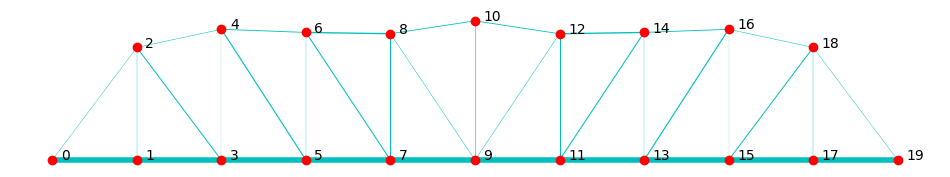

In [10]:
geom.plot_structure()

In [11]:
print(geom.return_variables())

(1.33196, 1.54672, 1.50928, 1.49382, 1.64641, 0.00030759, 0.00025579, 0.00070034, 0.00036893, 0.00011464, 0.00081443, 0.00061006, 0.00021561, 0.00074285, 0.00096042, 0.00076103, 0.00034219, 0.0005806, 0.00042114)


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
vars = [[1.0, 1.0, 1.0, 1.0, 1.0],
        [1.1, 1.1, 1.1, 1.1, 1.1],
        [1.2, 1.2, 1.2, 1.2, 1.2],
        [1.3, 1.3, 1.3, 1.3, 1.3],
        [1.4, 1.4, 1.4, 1.4, 1.4]]

x_locs = geom.nodes["x"]
y_locs = geom.nodes["y"]
node_map = geom.members[["Node 1", "Node 2"]]
x_map = node_map.replace(np.linspace(0, 19, 20), x_locs).to_numpy().T
y_list = np.zeros((2, 37))

for i in range(0, len(vars)):
    y_locs[[2, 4, 6, 8, 10, 12, 14, 16, 18]] = [vars[i][0], vars[i][1], vars[i][2], vars[i][3], vars[i][4], vars[i][3], vars[i][2], vars[i][1], vars[i][0]]
    y_map = node_map.replace(np.linspace(0, 19, 20), y_locs)
    y_list = np.append(y_list, y_map.T, axis=0)

In [14]:
print(y_list[2:4])

[[0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(-0.5, 10.5, -0.05, 1.05)

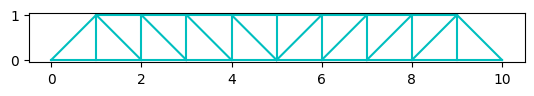

In [15]:
plt.plot(x_map, y_list[2:4], "c-")
plt.axis("scaled")

In [16]:
vars = {'x1': 0.8638, 'x2': 1.34002, 'x3': 1.47197, 'x4': 1.47197, 'x5': 1.77157, 'a1': 0.00045, 'a2': 0.00034, 'a3': 0.00073, 'a4': 0.00099, 'a5': 0.00078, 'a6': 0.00069, 'a7': 0.00085, 'a8': 0.00092, 'a9': 0.00012, 'a10': 0.00088, 'a11': 0.00011, 'a12': 0.00014, 'a13': 0.00078, 'a14': 0.00098}

In [17]:
geom.update_nodes([vars.get(a) for a in ['x1', 'x2', 'x3', 'x4', 'x5']])
geom.update_areas([vars.get(a) for a in ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14']])

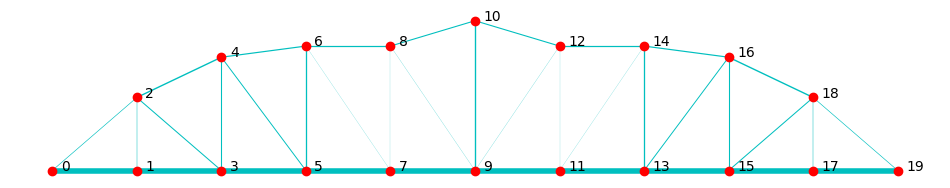

In [18]:
geom.plot_structure()

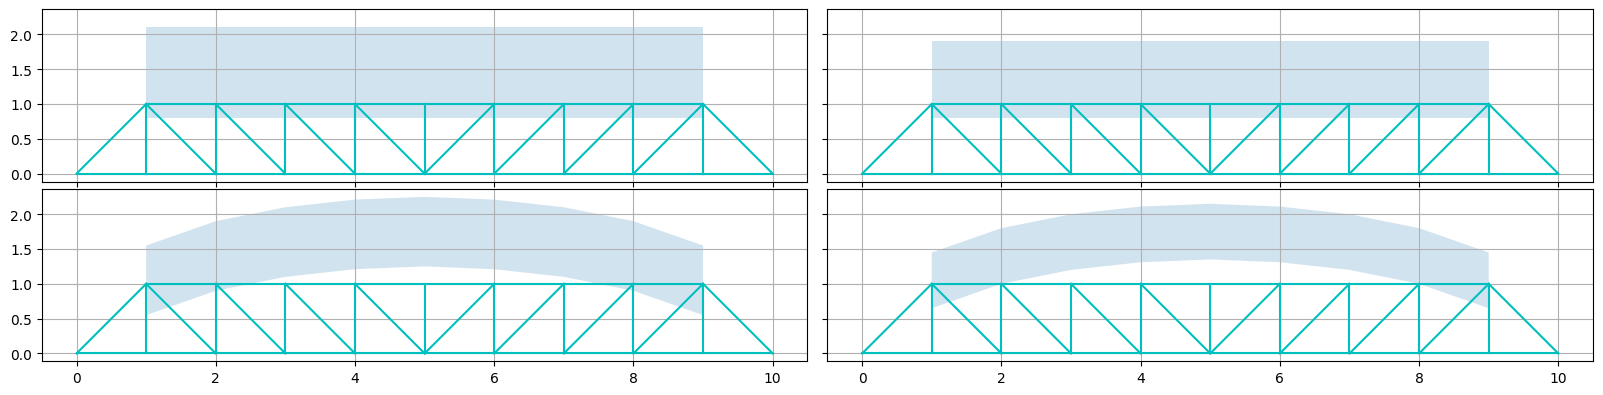

In [19]:
x = np.linspace(1, 9, 9)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16, 4))
y11 = np.ones(9) * 0.8
y12 = np.ones(9) * 2.1
ax[0, 0].fill_between(x, y11, y12, alpha=0.2)
ax[0, 0].plot(x_map, y_list[2:4], "c-")
ax[0, 0].set_aspect("equal")
ax[0, 0].grid()

y21 = np.ones(9) * 0.8
y22 = np.ones(9) * 1.9
ax[0, 1].fill_between(x, y21, y22, alpha=0.2)
ax[0, 1].plot(x_map, y_list[2:4], "c-")
ax[0, 1].set_aspect("equal")
ax[0, 1].grid()

y31 = [0.55, 0.90, 1.10, 1.21, 1.25, 1.21, 1.10, 0.90, 0.55]
y32 = [1.55, 1.90, 2.10, 2.21, 2.25, 2.21, 2.10, 1.90, 1.55]
ax[1, 0].fill_between(x, y31, y32, alpha=0.2)
ax[1, 0].plot(x_map, y_list[2:4], "c-")
ax[1, 0].set_aspect("equal")
ax[1, 0].grid()

y41 = [0.65, 1.00, 1.20, 1.31, 1.35, 1.31, 1.20, 1.00, 0.65]
y42 = [1.45, 1.80, 2.00, 2.11, 2.15, 2.11, 2.00, 1.80, 1.45]
ax[1, 1].fill_between(x, y41, y42, alpha=0.2)
ax[1, 1].plot(x_map, y_list[2:4], "c-")
ax[1, 1].set_aspect("equal")
ax[1, 1].grid()

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Score')

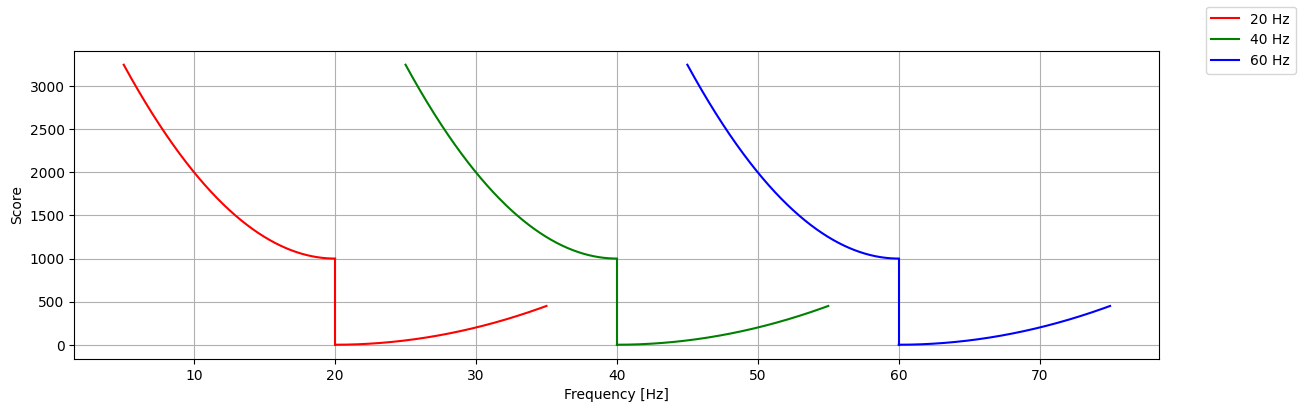

In [20]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(14, 4))

x1 = np.linspace(5, 20, 10000)
x2 = np.linspace(20, 35, 10000)
y1 = [(20 - x)**2 * 10 for x in x1]
y1[0:10000] += np.ones(10000) * 1000
y2 = [(20 - x)**2 * 2 for x in x2]

ax.plot(x1, y1, "r")
ax.plot(x2, y2, "r")
ax.plot([20, 20], [0, 1000], "r", label="20 Hz")

x1 = np.linspace(25, 40, 10000)
x2 = np.linspace(40, 55, 10000)
y1 = [(40 - x)**2 * 10 for x in x1]
y1[0:10000] += np.ones(10000) * 1000
y2 = [(40 - x)**2 * 2 for x in x2]

ax.plot(x1, y1, "g")
ax.plot(x2, y2, "g")
ax.plot([40, 40], [0, 1000], "g", label="40 Hz")

x1 = np.linspace(45, 60, 10000)
x2 = np.linspace(60, 75, 10000)
y1 = [(60 - x)**2 * 10 for x in x1]
y1[0:10000] += np.ones(10000) * 1000
y2 = [(60 - x)**2 * 2 for x in x2]

ax.plot(x1, y1, "b")
ax.plot(x2, y2, "b")
ax.plot([60, 60], [0, 1000], "b", label="60 Hz")
ax.grid()

fig.legend(loc=1)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Score")
plt.show()

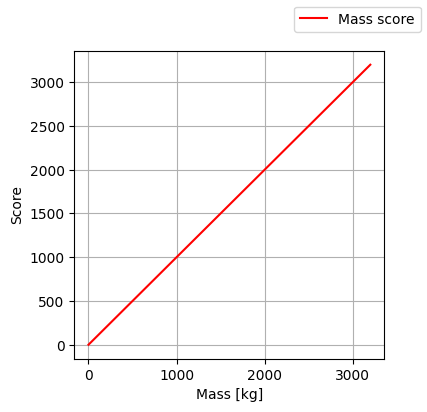

In [21]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(4, 4))

x = np.linspace(0, 3200, 2)
y = x

ax.plot(x, y, "r", label="Mass score")
ax.set_xlabel("Mass [kg]")
ax.set_ylabel("Score")
ax.grid()
fig.legend()
plt.show()

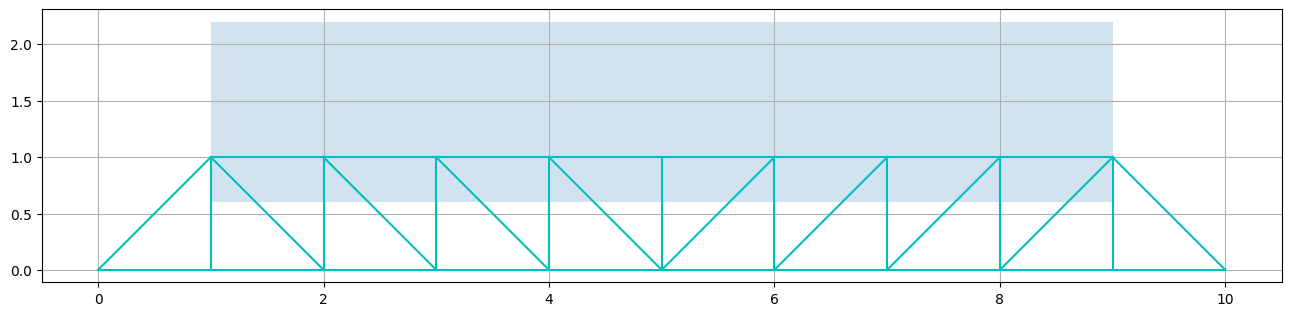

In [23]:
x = np.linspace(1, 9, 9)

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(16, 4))
y1 = np.ones(9) * 0.6
y2 = np.ones(9) * 2.2
ax.fill_between(x, y1, y2, alpha=0.2)
ax.plot(x_map, y_list[2:4], "c-")
ax.set_aspect("equal")
ax.grid()
plt.show()